In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'

# 파일 경로
baseball_file_new = '2022_야구경기.csv'
event_file_new = '2022_행사.csv'
station_file_new = '2022_종합운동장역_2호선_승하차.csv'

# 데이터 로드
baseball_data_new = pd.read_csv(baseball_file_new)
event_data_new = pd.read_csv(event_file_new)
station_data_new = pd.read_csv(station_file_new)




In [7]:
# 날짜 형식 통일 및 필요한 데이터 추출
baseball_data_new['경기날짜'] = pd.to_datetime(baseball_data_new['경기날짜'])
event_data_new['행사날짜'] = pd.to_datetime(event_data_new['행사날짜'])
station_data_new['수송일자'] = pd.to_datetime(station_data_new['수송일자'])

# 행사 및 경기가 있는 날짜 리스트 생성
event_days = pd.concat([baseball_data_new['경기날짜'], event_data_new['행사날짜']]).drop_duplicates()

# 시간대 열 추출
time_columns = [col for col in station_data_new.columns if ':' in col]

# 행사 및 경기가 있는 날 필터링
event_days_only = station_data_new[station_data_new['수송일자'].dt.date.isin(event_days.dt.date)]

In [8]:
# 평일과 주말로 나누어 평균 승하차 인원 계산
event_days_only['요일'] = event_days_only['수송일자'].dt.weekday
weekday_event = event_days_only[event_days_only['요일'] < 5]
weekend_event = event_days_only[event_days_only['요일'] >= 5]

# 모든 시간대 열을 숫자로 변환
weekday_event[time_columns] = weekday_event[time_columns].apply(pd.to_numeric, errors='coerce')
weekend_event[time_columns] = weekend_event[time_columns].apply(pd.to_numeric, errors='coerce')

# 시간대별 평균 계산
weekday_event_avg_win = weekday_event[weekday_event['승하차구분'] == '승차'][time_columns].mean()
weekday_event_avg_lose = weekday_event[weekday_event['승하차구분'] == '하차'][time_columns].mean()
weekend_event_avg_win = weekend_event[weekend_event['승하차구분'] == '승차'][time_columns].mean()
weekend_event_avg_lose = weekend_event[weekend_event['승하차구분'] == '하차'][time_columns].mean()

time_labels = time_columns

C:\Users\lee\AppData\Local\Temp\ipykernel_24340\3704905764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_days_only['요일'] = event_days_only['수송일자'].dt.weekday
C:\Users\lee\AppData\Local\Temp\ipykernel_24340\3704905764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_event[time_columns] = weekday_event[time_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\lee\AppData\Local\Temp\ipykernel_24340\3704905764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

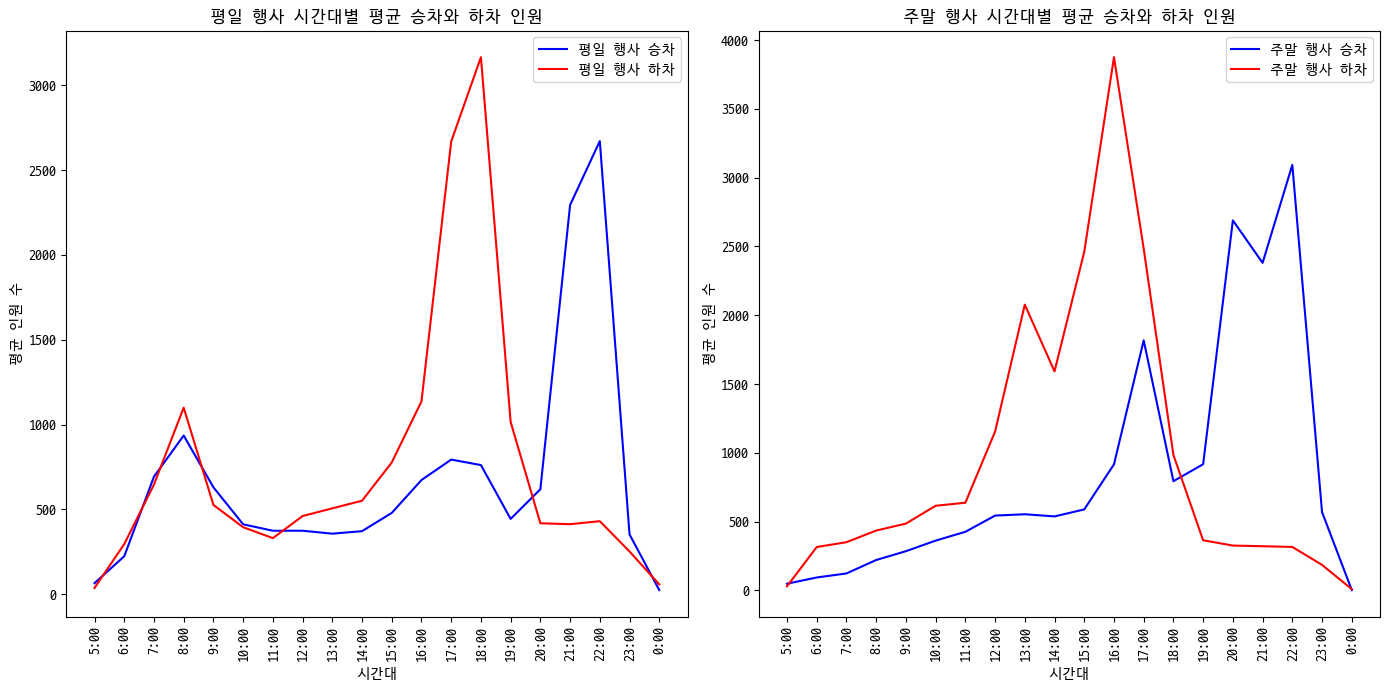

In [9]:
plt.figure(figsize=(14, 7))

# 평일 행사 승하차 인원 그래프
plt.subplot(1, 2, 1)
plt.plot(time_labels, weekday_event_avg_win, label='평일 행사 승차', color='blue')
plt.plot(time_labels, weekday_event_avg_lose, label='평일 행사 하차', color='red')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.xlabel('시간대')
plt.ylabel('평균 인원 수')
plt.title('평일 행사 시간대별 평균 승차와 하차 인원')
plt.legend()

# 주말 행사 승하차 인원 그래프
plt.subplot(1, 2, 2)
plt.plot(time_labels, weekend_event_avg_win, label='주말 행사 승차', color='blue')
plt.plot(time_labels, weekend_event_avg_lose, label='주말 행사 하차', color='red')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.xlabel('시간대')
plt.ylabel('평균 인원 수')
plt.title('주말 행사 시간대별 평균 승차와 하차 인원')
plt.legend()

plt.tight_layout()
plt.show()